# Método da Oscilação ou Método da Sensibilidade

In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import math

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp= 26.431820859167672
Tau= 984.0594888279699
Delay= 99.29375000395189

In [5]:
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([26.43182086]), array([984.05948883,   1.        ]))

## Pade Approximation / Dead Time

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.00020286]), array([1.00000000e+00, 2.01422547e-02, 2.02855212e-04]))

## FOPDT

In [7]:
FOPDT = control.series(sys, Pade)
FOPDT

TransferFunction(array([0.00536183]), array([9.84059489e+02, 2.08211768e+01, 2.19763851e-01, 2.02855212e-04]))

In [8]:
# Simulate step response
t, y = control.step_response(FOPDT)

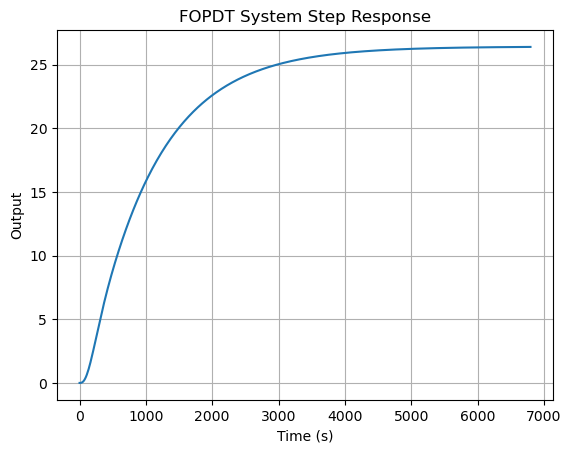

In [9]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('FOPDT System Step Response')
plt.grid()
plt.show()

## ZIEGLER e NICHOLS - Método 2

### Determine Ku and Pu

In [10]:
Poles = control.poles(FOPDT)
Poles

array([-0.01007113+0.01007113j, -0.01007113-0.01007113j,
       -0.0010162 +0.j        ])

In [11]:
gm, pm, sm, wpc, wgc, wms = control.stability_margins(FOPDT)

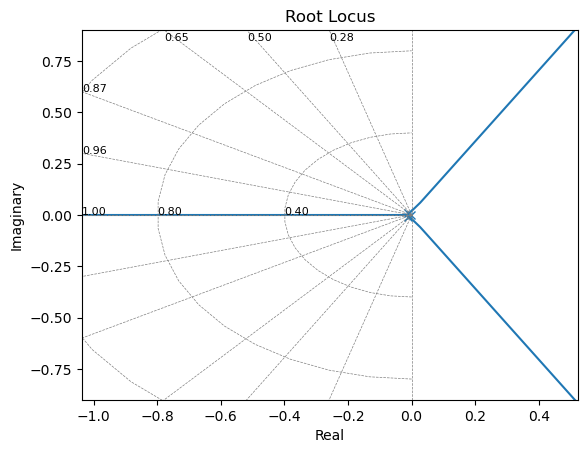

In [12]:
roots, gains = control.root_locus(FOPDT)

### Ganho Limite / Crítico

In [13]:
#Gain margin
Ku = gm
Ku

0.8293820972971115

### Período Crítico

In [14]:
Controller = Ku

In [15]:
Sys_Control = control.series(Controller, FOPDT)

In [16]:
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [17]:
t, y = control.step_response(cl_sys)

In [18]:
# Simulate step response
t, y = control.step_response(cl_sys, T=2*int(t.max()), T_num=2*int(t.max())+1)

## Calculate Oscillation Period by Peak Analysis

In [19]:
import numpy as np
from scipy.signal import find_peaks

In [20]:
peaks, _ = find_peaks(y)

In [21]:
dt = np.diff(t[peaks])

In [22]:
T = np.mean(dt)

In [23]:
print("The average oscillation period is", T, "seconds")

The average oscillation period is 420.3333333333333 seconds


## Calculate Oscillation Period by Phase crossover frequency

In [24]:
#Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
fKu = wpc/(2*math.pi)
Pu = 1/fKu
Pu

420.44812212954525

## Plot Critical Gain - Step Response

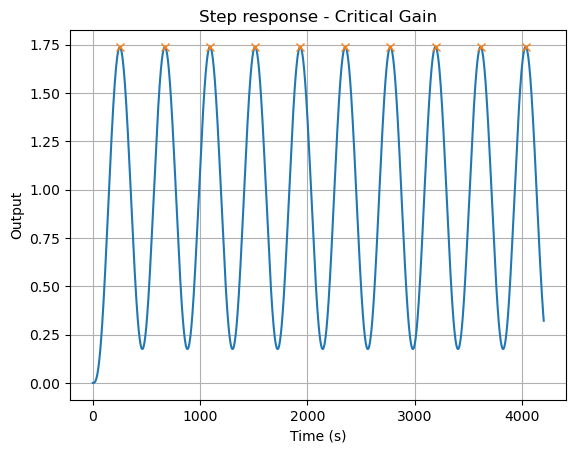

In [25]:
# Plot step response
plt.plot(t, y)
plt.plot(peaks, y[peaks], "x")
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response - Critical Gain')
plt.grid()
plt.show()

## P Controller

In [26]:
Kc = 0.5*Ku
Kc

0.41469104864855577

In [27]:
# Define transfer function of the P Controller
Controller = Kc

### Open Loop

In [28]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [29]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [30]:
# Simulate step response
t, y = control.step_response(cl_sys)

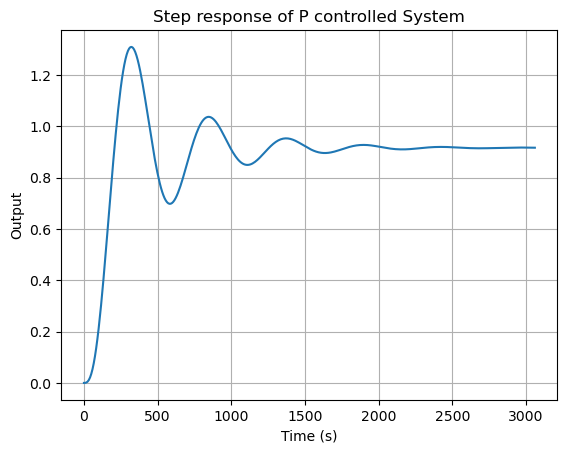

In [31]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of P controlled System')
plt.grid()
plt.show()

## PI Controller

In [32]:
Kc = 0.45*Ku
Kc

0.3732219437837002

In [33]:
ti= Pu/1.2
ti

350.3734351079544

In [34]:
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)))

### Open Loop

In [35]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [36]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [37]:
# Simulate step response
t, y = control.step_response(cl_sys)

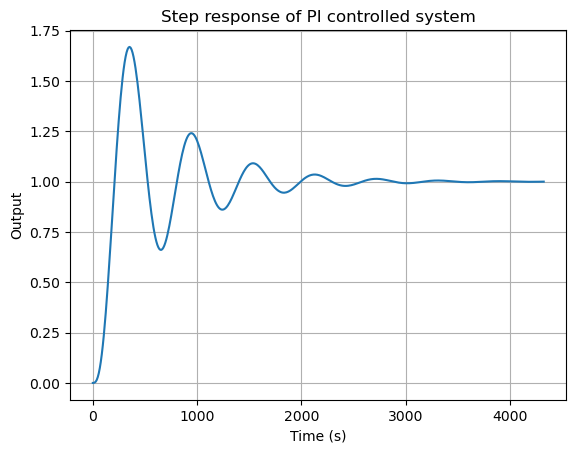

In [38]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of PI controlled system')
plt.grid()
plt.show()

## PID Controller

In [39]:
Kc = 0.6*Ku
Kc

0.4976292583782669

In [40]:
ti= 0.5*Pu
ti

210.22406106477263

In [41]:
td = 0.125*Pu
td

52.55601526619316

In [42]:
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)) + (td*s))

### Open Loop

In [43]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [44]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [45]:
# Simulate step response
t, y = control.step_response(cl_sys)

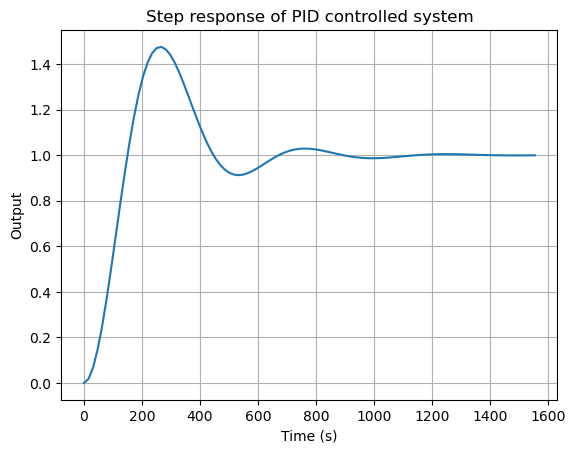

In [46]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of PID controlled system')
plt.grid()
plt.show()